In [1]:
#
from datetime import datetime
target_code = '033340'
#date_from = '1995-5-2'
date_from  = '2015-5-2'
today=  datetime.now().strftime('%Y-%m-%d')
today

'2021-02-27'

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = marcap_data(date_from, today, target_code)

In [5]:
latest_stocks = df.iloc[-1]['Stocks']
latest_stocks

49908224.0

In [6]:
df['Adj Close'] = df['Close'] / latest_stocks * df['Stocks']

<AxesSubplot:xlabel='Date'>

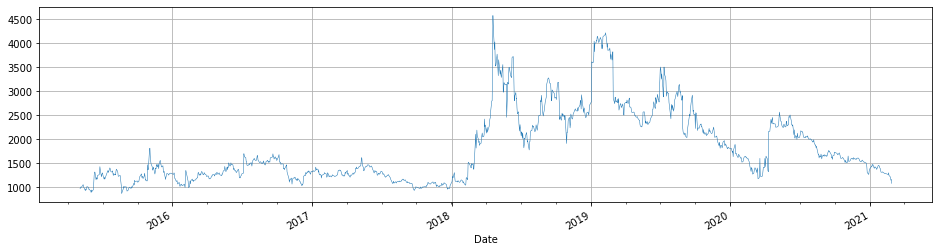

In [7]:
df['Adj Close'].plot()

In [8]:
df['Adj Close'].iloc[-1]

1075.0

In [9]:
df.iloc[-1]

Code                  033340
Name                   좋은사람들
Market                KOSDAQ
Dept                   중견기업부
Close                 1075.0
ChangeCode                 2
Changes                -80.0
ChagesRatio              NaN
Open                  1135.0
High                  1150.0
Low                   1050.0
Volume             2003489.0
Amount          2177098835.0
Marcap         53651340800.0
Stocks            49908224.0
MarketId                 KSQ
Rank                    2049
ChangesRatio           -6.93
Adj Close             1075.0
Name: 2021-02-26 00:00:00, dtype: object

In [10]:
import scipy.stats

In [11]:
c_min = df['Adj Close'].min()
c_max = df['Adj Close'].max()
c_mean = df['Adj Close'].mean()
c_std = df['Adj Close'].std()

c_current = df['Adj Close'].iloc[-1]

c_norm = scipy.stats.norm(c_mean, c_std)
print(c_min, c_max, c_mean, c_current, c_norm.cdf(c_current))

862.6320519840577 4572.479097633288 1784.9290692315708 1075.0 0.16563851037516053


In [12]:
c_mean/c_current

1.660399134168903